# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data setup and exploration

In [2]:
payments = pd.read_csv('../input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [3]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

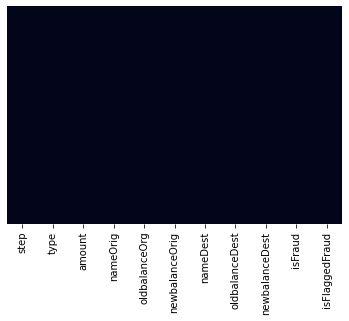

In [6]:
# Checking missing data

sns.heatmap(payments.isnull(),yticklabels=False,cbar=False)

In [7]:
# No missing data, so moving on to EDA

<AxesSubplot:xlabel='type', ylabel='count'>

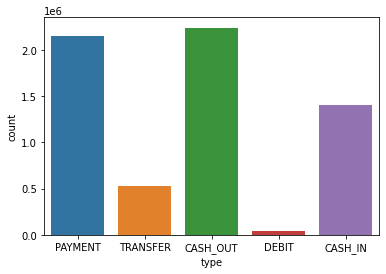

In [8]:
sns.countplot(x='type',data=payments)

Cash out and payment are the most common type of transactions.

<AxesSubplot:xlabel='type', ylabel='amount'>

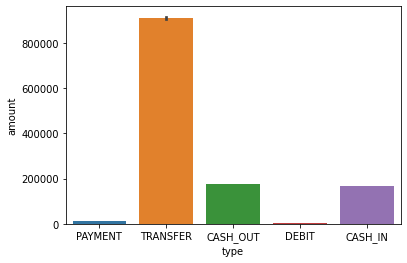

In [9]:
sns.barplot(x='type',y='amount',data=payments)

Although 'cash out' and 'payment' are the most common type of transactions, 'transfer' type has the maximum amount of money being transfered to the recipient.

<AxesSubplot:xlabel='isFraud', ylabel='count'>

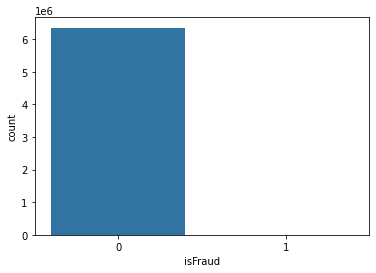

In [10]:
sns.countplot(x='isFraud',data=payments)

The above graph indicates that the dataset is highly unbalanced.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

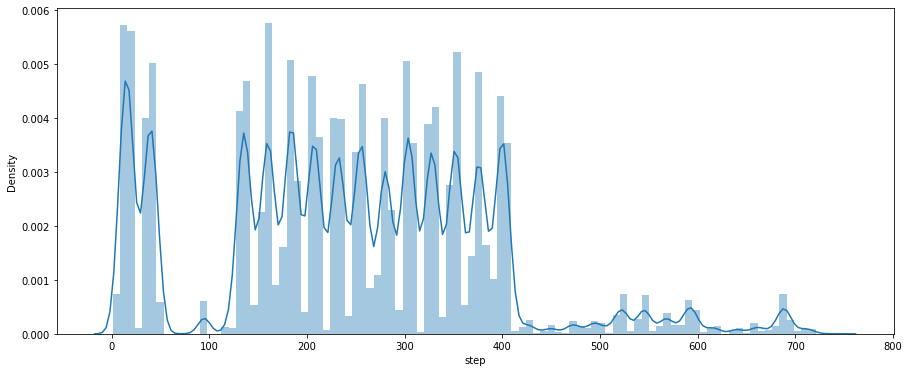

In [11]:
plt.figure(figsize=(15,6))
sns.distplot(payments['step'],bins=100)

The above graph indicates the distribution of the step column.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

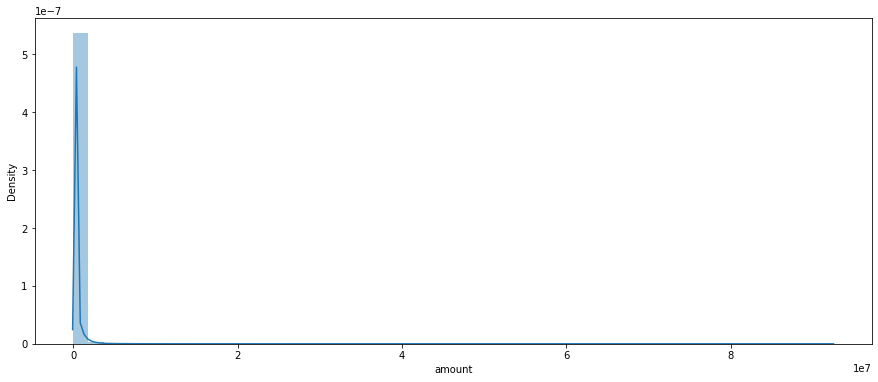

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(payments['amount'])

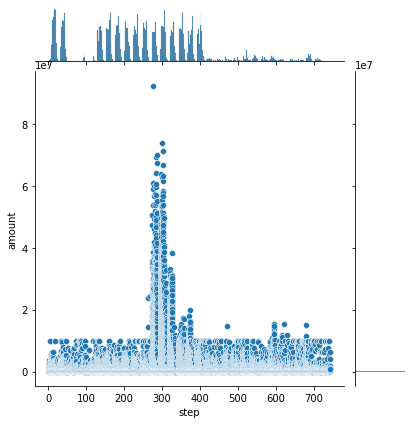

In [13]:
sns.jointplot(x='step',y='amount',data=payments)

The above graph indicates that a step value of approx. 300 corresponds to the maximum amount transfered to a recipient.

Text(0, 0.5, 'isFraud')

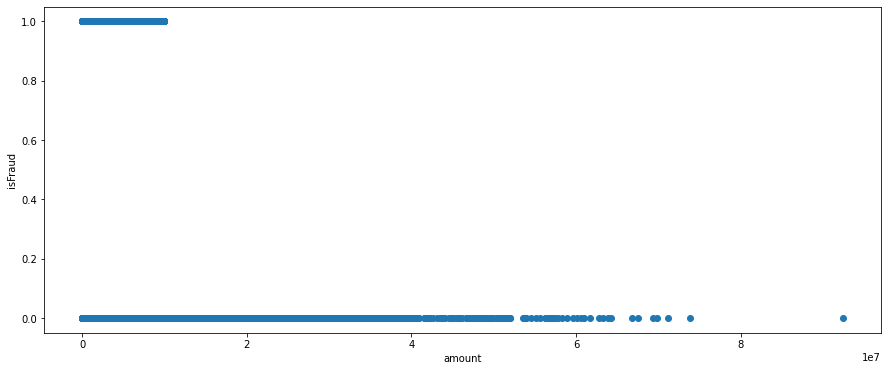

In [14]:
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud',data=payments)
plt.xlabel('amount')
plt.ylabel('isFraud')

Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 1e7 (10,000,000) amount.

In [15]:
payments['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
8213/6354407*100

0.129248881917699

8213 transactions have been tagged as fraudulent in the dataset, which is approx. 0.13% of the total number of transactions.

Text(0, 0.5, 'isFraud')

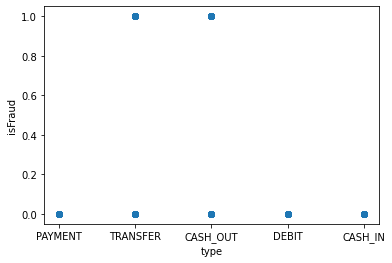

In [17]:
plt.scatter(x='type',y='isFraud',data=payments)
plt.xlabel('type')
plt.ylabel('isFraud')

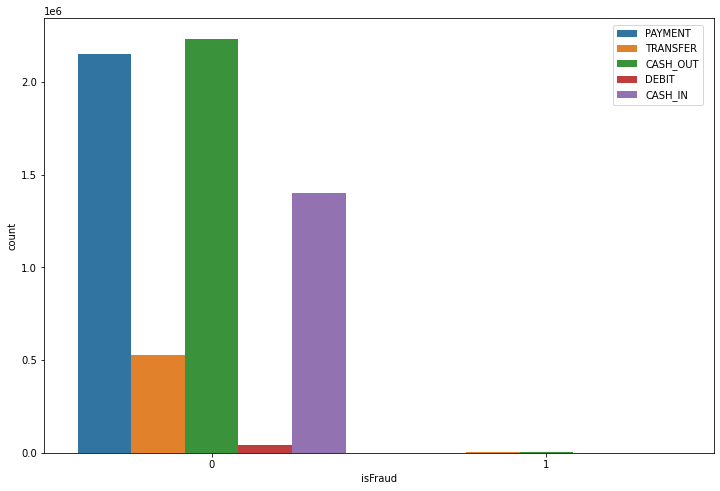

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=payments,hue='type')
plt.legend(loc=[0.85,0.8])

Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.

# Handling categorical variables

In [19]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
type_new = pd.get_dummies(payments['type'],drop_first=True)

In [21]:
payments = pd.concat([payments,type_new],axis=1)

In [22]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


# Building the model

In [23]:
X = payments[['step','CASH_OUT','DEBIT','PAYMENT','TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = payments['isFraud']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred_lr = lr.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.37      0.43      0.40      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.72      0.70   1908786
weighted avg       1.00      1.00      1.00   1908786



Thanks for reading!